In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 1. Membaca dataset
df = pd.read_csv(r'C:\Users\OPTION\Downloads\Python DA\Projects 15_Business Analytics Of Submachine Guns Models Manufacture Around The World 2022\df_2.csv')
df

,ID_Number,Name,Manufacturer,Cartridge,Country,Introduced,Type,Unspecified
0,0,A-M20,Vigilance Rifles,9×19mm NATO,United States,2020,SMG,Unspecified
1,1,FAMAE SAF,FAMAE,9×19mm Parabellum,Chile,1993,SMG,Unspecified
2,2,Agram 2000,Agram,9×19mm Parabellum,Yugoslavia Croatia,2000,SMG,Unspecified
3,3,AL-43,Valtion Kivääritehdas,9x35mm Lahti7.62x35mm Lahti,Finland,1943,SMG,Unspecified
4,4,AMAC Delta-786,American Military Arms Corporation,9x19mm,United States,1980s,SMG,Unspecified
...,...,...,...,...,...,...,...,...
165,165,Z-45,"Star Bonifacio Echeverria, S.A.",9x19mm Parabellum9×23mm Largo.38 Super.45 ACP,Spain,1945,SMG,Unspecified
166,166,Z84,"Star Bonifacio Echeverria, S.A.",9x19mm Parabellum,Spain,1984,SMG,Unspecified
167,167,Zagi M-91,Unspecified,9×19mm Parabellum,Yugoslavia Croatia,1991,SMG,Unspecified
168,168,ZB-47,Zbrojovka Brno,9×19mm Parabellum,Czechoslovakia,1947,SMG,Unspecified


In [4]:
# Menampilkan informasi dasar
print("Dimensi awal dataset:", df.shape)

Dimensi awal dataset: (170, 8)


In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID_Number     170 non-null    int64 
 1   Name          170 non-null    object
 2   Manufacturer  170 non-null    object
 3   Cartridge     170 non-null    object
 4   Country       170 non-null    object
 5   Introduced    170 non-null    object
 6   Type          170 non-null    object
 7   Unspecified   170 non-null    object
dtypes: int64(1), object(7)
memory usage: 10.8+ KB


,ID_Number
count,170.000000
mean,84.500000
std,49.218899
min,0.000000
25%,42.250000
50%,84.500000
75%,126.750000
max,169.000000


In [7]:
print("=== Sebelum Cleaning ===")
print("Shape:", df.shape)
print(df.info())

=== Sebelum Cleaning ===
Shape: (170, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID_Number     170 non-null    int64 
 1   Name          170 non-null    object
 2   Manufacturer  170 non-null    object
 3   Cartridge     170 non-null    object
 4   Country       170 non-null    object
 5   Introduced    170 non-null    object
 6   Type          170 non-null    object
 7   Unspecified   170 non-null    object
dtypes: int64(1), object(7)
memory usage: 10.8+ KB
None


In [8]:
# 2. Deteksi duplikat dan missing values
duplicates = df.duplicated()
print("Jumlah duplikat:", duplicates.sum())

missing_values = df.isnull().sum()
print("Missing values per kolom:\n", missing_values)

Jumlah duplikat: 0
Missing values per kolom:
 ID_Number       0
Name            0
Manufacturer    0
Cartridge       0
Country         0
Introduced      0
Type            0
Unspecified     0
dtype: int64


In [9]:
# 3. Konversi kolom Introduced ke datetime
df['Introduced'] = pd.to_datetime(df['Introduced'], errors='coerce')

# Ekstrak tahun untuk analisis (misalnya, untuk deteksi outlier)
df['Year'] = df['Introduced'].dt.year

In [10]:
# 4. Deteksi outlier pada kolom Year
current_year = pd.Timestamp.now().year
# Definisikan outlier: tahun < 1900 atau tahun > tahun sekarang (bisa disesuaikan)
outliers = df[(df['Year'] < 1900) | (df['Year'] > current_year)]
print("Jumlah outliers pada kolom Year:", outliers.shape[0])

Jumlah outliers pada kolom Year: 0


In [11]:
# 5. Data Cleaning: Hapus duplikat, missing values, dan outliers
df_cleaned = df.drop_duplicates()
df_cleaned = df_cleaned.dropna(subset=['Name', 'Manufacturer', 'Country', 'Introduced', 'Type'])
df_cleaned = df_cleaned[(df_cleaned['Year'] >= 1900) & (df_cleaned['Year'] <= current_year)]

print("\n=== Setelah Cleaning ===")
print("Shape:", df_cleaned.shape)


=== Setelah Cleaning ===
Shape: (159, 9)


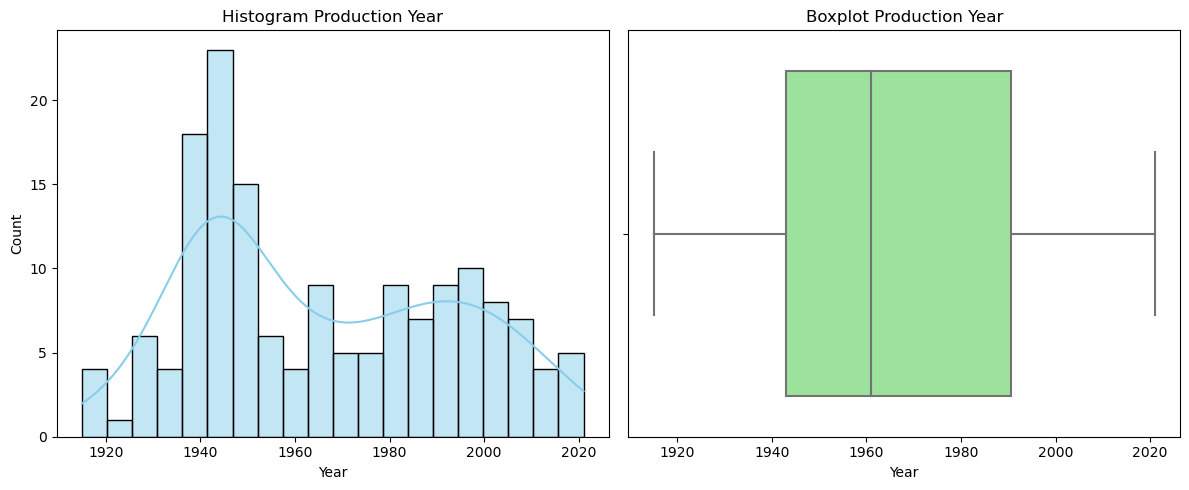

In [12]:
# 6. Visualisasi: Histogram dan Box Plot untuk kolom Year
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['Year'], kde=True, bins=20, color='skyblue')
plt.title("Histogram Production Year")

plt.subplot(1, 2, 2)
sns.boxplot(x=df_cleaned['Year'], color='lightgreen')
plt.title("Boxplot Production Year")
plt.tight_layout()
plt.show()

In [13]:
# 7. Perbandingan data sebelum dan sesudah cleaning
print("\nPerbandingan Jumlah Baris:")
print("Sebelum Cleaning:", df.shape[0])
print("Sesudah Cleaning:", df_cleaned.shape[0])



Perbandingan Jumlah Baris:
Sebelum Cleaning: 170
Sesudah Cleaning: 159


In [14]:
df_cleaned.to_csv('df_2-CLEANED.csv', index=False)
print("Dataset yang telah dibersihkan telah disimpan sebagai 'df_2-CLEANED.csv'")

Dataset yang telah dibersihkan telah disimpan sebagai 'df_2-CLEANED.csv'


In [15]:
# Menghitung metrik distinct
print("Distinct Product Names:", df_cleaned['Name'].nunique())
print("Distinct Manufacturers:", df_cleaned['Manufacturer'].nunique())
print("Distinct Countries:", df_cleaned['Country'].nunique())
print("Distinct Types:", df_cleaned['Type'].nunique())

Distinct Product Names: 159
Distinct Manufacturers: 121
Distinct Countries: 51
Distinct Types: 9


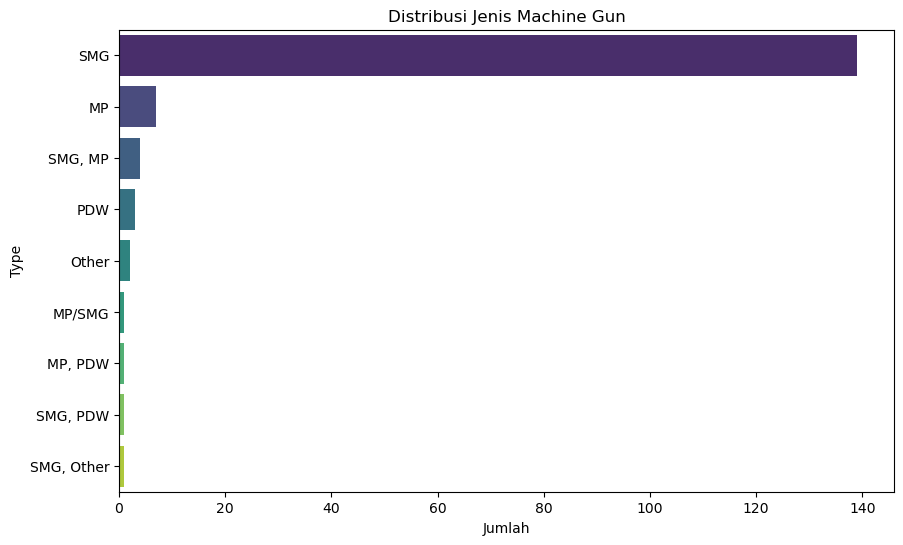

In [16]:
# Bar Chart: Distribusi jenis machine gun
plt.figure(figsize=(10,6))
sns.countplot(y='Type', data=df_cleaned, order=df_cleaned['Type'].value_counts().index, palette='viridis')
plt.title("Distribusi Jenis Machine Gun")
plt.xlabel("Jumlah")
plt.ylabel("Type")
plt.show()

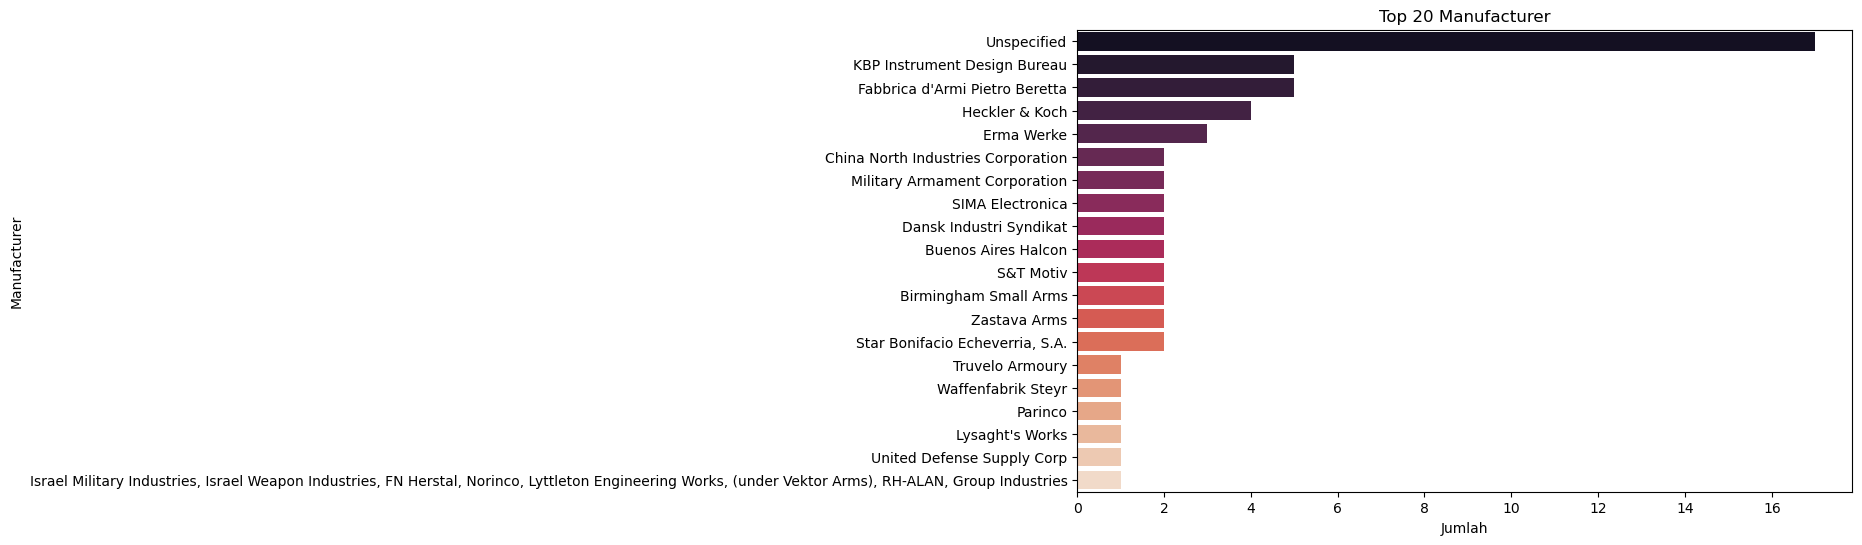

In [17]:
# Bar Chart: Top 20 Manufacturer
top_manufacturers = df_cleaned['Manufacturer'].value_counts().head(20)
plt.figure(figsize=(10,6))
sns.barplot(x=top_manufacturers.values, y=top_manufacturers.index, palette='rocket')
plt.title("Top 20 Manufacturer")
plt.xlabel("Jumlah")
plt.ylabel("Manufacturer")
plt.show()

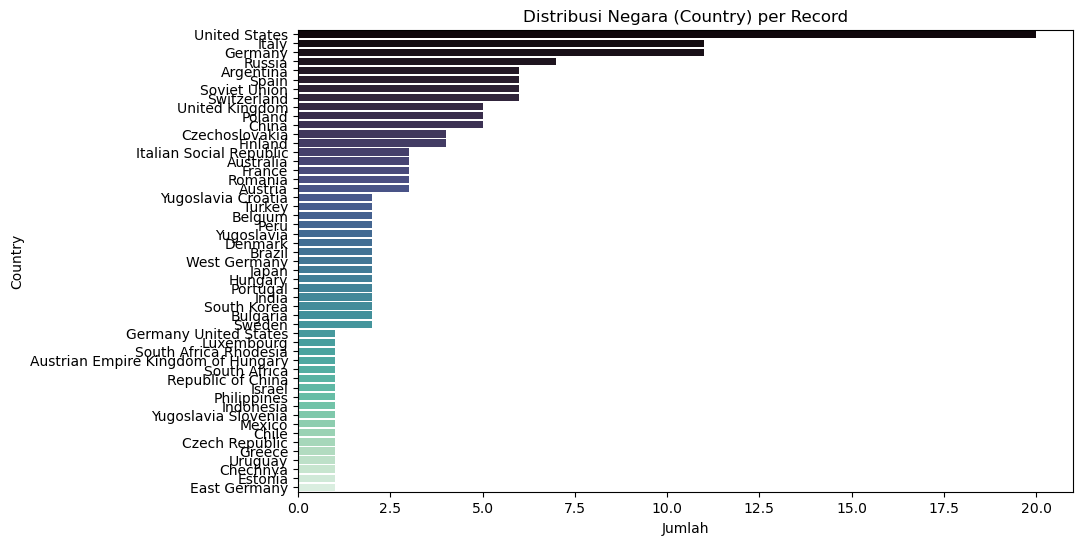

In [18]:
# Bar Chart: Distribusi Country
plt.figure(figsize=(10,6))
sns.countplot(y='Country', data=df_cleaned, order=df_cleaned['Country'].value_counts().index, palette='mako')
plt.title("Distribusi Negara (Country) per Record")
plt.xlabel("Jumlah")
plt.ylabel("Country")
plt.show()

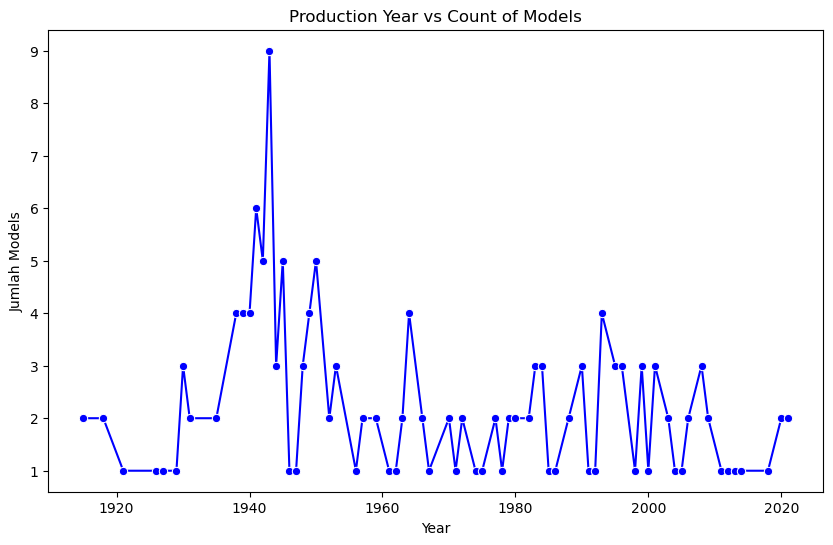

In [19]:
# Line Chart: Production Year vs Count of Models
year_counts = df_cleaned['Year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o', color='blue')
plt.title("Production Year vs Count of Models")
plt.xlabel("Year")
plt.ylabel("Jumlah Models")
plt.show()


In [20]:
# import streamlit as st

# st.title("Dashboard Analisis Data Machine Gun")

# st.sidebar.header("Filter Data")
# # Contoh filter berdasarkan jenis senjata
# selected_types = st.sidebar.multiselect("Pilih Type", df_cleaned['Type'].unique())
# if selected_types:
#     df_filtered = df_cleaned[df_cleaned['Type'].isin(selected_types)]
# else:
#     df_filtered = df_cleaned

# st.header("Metrik Unik")
# st.write("Distinct Product Names:", df_filtered['Name'].nunique())
# st.write("Distinct Manufacturers:", df_filtered['Manufacturer'].nunique())
# st.write("Distinct Countries:", df_filtered['Country'].nunique())
# st.write("Distinct Types:", df_filtered['Type'].nunique())

# # Visualisasi: Distribusi Jenis Machine Gun
# st.subheader("Distribusi Jenis Machine Gun")
# fig1, ax1 = plt.subplots(figsize=(8, 4))
# sns.countplot(y='Type', data=df_filtered, order=df_filtered['Type'].value_counts().index, palette='viridis', ax=ax1)
# st.pyplot(fig1)

# # Visualisasi: Top 20 Manufacturer
# st.subheader("Top 20 Manufacturer")
# fig2, ax2 = plt.subplots(figsize=(8, 4))
# top_manuf = df_filtered['Manufacturer'].value_counts().head(20)
# sns.barplot(x=top_manuf.values, y=top_manuf.index, palette='rocket', ax=ax2)
# st.pyplot(fig2)

# # Visualisasi: Distribusi Negara
# st.subheader("Distribusi Negara per Record")
# fig3, ax3 = plt.subplots(figsize=(8, 4))
# sns.countplot(y='Country', data=df_filtered, order=df_filtered['Country'].value_counts().index, palette='mako', ax=ax3)
# st.pyplot(fig3)

# # Visualisasi: Production Year vs Count of Models
# st.subheader("Production Year vs Count of Models")
# fig4, ax4 = plt.subplots(figsize=(8, 4))
# year_counts = df_filtered['Year'].value_counts().sort_index()
# sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o', color='blue', ax=ax4)
# st.pyplot(fig4)
